# First Project: Impact of Weather on Crime in Austin

In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database

# Set start & end times to request from APIs
start_dt = dt.datetime(2018, 1, 1)
end_dt = dt.datetime(2019, 12, 31, 23, 59, 59)

## Perform API Call - Austin Crime Data (data.austintexas.gov)

## Option #1: Get Data from API

In [ ]:
# Convert these to strings
start_str = 'T'.join(str(start_dt).split())
end_str = 'T'.join(str(end_dt).split())

# Initialize loop
obj_crime = Crime()
json_crime = []
prev_start = "a;sdlfkj"

# Loop to retrieve data
while start_str != prev_start:  # if this start date and the last start date are the same, this is because no crimes were found, which means we are at the end
    
    print("Calling API for start date of", start_str)
    
    # get as much data within the time range as possible
    obj_crime = Crime()
    new_json = obj_crime.get_json_crime(start_str, end_str)
    json_crime.extend(new_json)
    print(len(new_json), 'rows', end='\n\n')
    
    # update the start date/time of the next API call as the last date/time received from this call
    prev_start = start_str
    start_str = max(crime["rep_date_time"] for crime in new_json)
    
# Convert to data frame, save, and present
df_crime = obj_crime.get_df_crime(json_crime)
df_crime.to_csv('data/crime.csv', index=False)
df_crime

## Option #2: Load from a Saved File

In [2]:
df_crime = pd.read_csv('data/crime.csv')
df_crime

,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2018-01-01T00:05:00.000,201810032,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,2018-01-01T00:00:00.000,RESIDENCE / HOME,78701.0,NaN,NaN,1514786400
1,2018-01-01T00:09:00.000,201810042,DWI,2100,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78748.0,NaN,NaN,1514786400
2,2018-01-01T00:10:00.000,201810047,THEFT OF SERVICE,608,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78723.0,NaN,NaN,1514786400
3,2018-01-01T00:10:00.000,201810043,DOC DISCHARGE GUN - PUB PLACE,2408,N,2018-01-01T00:00:00.000,OTHER / UNKNOWN,78721.0,NaN,NaN,1514786400
4,2018-01-01T00:13:00.000,20185000001,VIOL OF EMERG PROTECTIVE ORDER,3008,N,2017-12-31T00:00:00.000,RESIDENCE / HOME,78750.0,NaN,NaN,1514786400
...,...,...,...,...,...,...,...,...,...,...,...
210220,2019-12-31T23:37:00.000,20193652135,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78727.0,NaN,NaN,1577854800
210221,2019-12-31T23:42:00.000,20193652146,DWI,2100,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701.0,NaN,NaN,1577854800
210222,2019-12-31T23:47:00.000,20193651961,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-12-31T00:00:00.000,GAS / SERVICE STATIONS,78752.0,NaN,NaN,1577854800
210223,2019-12-31T23:58:00.000,20193651731,RUNAWAY CHILD,4100,N,2019-12-31T00:00:00.000,OTHER / UNKNOWN,78704.0,NaN,NaN,1577854800


## Perform API Call - Weather Data (Dark Sky)

## Option #1: Get Data from API

In [3]:
# Create a weather object
obj_weather = Weather()

# Get set of dates to request from Dark Sky
one_day = dt.timedelta(1)
num_days = (end_dt - start_dt).days
timestamps = [int((start_dt + i * one_day).timestamp()) for i in range(num_days + 1)]

# Get weather data
json_weather = []
for timestamp in timestamps:
    print(dt.datetime.fromtimestamp(timestamp))
    json_weather.extend(obj_weather.get_json_weather(timestamp))
    
# Convert to data frame, save, and present
df_weather = obj_weather.get_df_weather(json_weather)
df_weather.to_csv('data/weather.csv', index=False)
df_weather

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-06 00:00:00
2018-01-07 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00


,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed,Moon Phase
0,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,26.54,0,9.997,8.0,8.08,0.50
1,1514790000,18.43,1.00,19.40,0.75,cloudy,0.0,0.0,1038.3,Overcast,26.27,0,9.997,8.0,7.21,0.50
2,1514793600,17.99,1.00,19.40,0.75,cloudy,0.0,0.0,1038.7,Overcast,26.27,0,9.997,2.0,7.82,0.50
3,1514797200,18.86,1.00,15.91,0.65,cloudy,0.0,0.0,1039.0,Overcast,26.09,0,9.997,351.0,6.39,0.50
4,1514800800,18.38,1.00,15.23,0.63,cloudy,0.0,0.0,1039.3,Overcast,26.09,0,9.997,2.0,6.99,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,1577840400,51.59,0.66,23.58,0.33,partly-cloudy-night,0.0,0.0,1021.8,Mostly Cloudy,51.59,0,10.000,126.0,0.73,0.19
17516,1577844000,52.53,0.65,26.83,0.37,partly-cloudy-night,0.0,0.0,1021.7,Mostly Cloudy,52.53,0,10.000,134.0,0.73,0.19
17517,1577847600,50.80,0.92,27.21,0.40,cloudy,0.0,0.0,1021.5,Overcast,50.80,0,10.000,148.0,4.24,0.19
17518,1577851200,50.34,0.62,27.46,0.41,partly-cloudy-night,0.0,0.0,1021.4,Mostly Cloudy,50.34,0,10.000,143.0,3.17,0.19


## Option #2: Load from Saved File

In [4]:
df_weather = pd.read_csv('data/weather.csv')
df_weather

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,Temperature,UV Index,Visibility,Wind Bearing,Wind Speed,Moon Phase
0,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,26.54,0,9.997,8.0,8.08,0.50
1,1514790000,18.43,1.00,19.40,0.75,cloudy,0.0,0.0,1038.3,Overcast,26.27,0,9.997,8.0,7.21,0.50
2,1514793600,17.99,1.00,19.40,0.75,cloudy,0.0,0.0,1038.7,Overcast,26.27,0,9.997,2.0,7.82,0.50
3,1514797200,18.86,1.00,15.91,0.65,cloudy,0.0,0.0,1039.0,Overcast,26.09,0,9.997,351.0,6.39,0.50
4,1514800800,18.38,1.00,15.23,0.63,cloudy,0.0,0.0,1039.3,Overcast,26.09,0,9.997,2.0,6.99,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,1577840400,51.59,0.66,23.58,0.33,partly-cloudy-night,0.0,0.0,1021.8,Mostly Cloudy,51.59,0,10.000,126.0,0.73,0.19
17516,1577844000,52.53,0.65,26.83,0.37,partly-cloudy-night,0.0,0.0,1021.7,Mostly Cloudy,52.53,0,10.000,134.0,0.73,0.19
17517,1577847600,50.80,0.92,27.21,0.40,cloudy,0.0,0.0,1021.5,Overcast,50.80,0,10.000,148.0,4.24,0.19
17518,1577851200,50.34,0.62,27.46,0.41,partly-cloudy-night,0.0,0.0,1021.4,Mostly Cloudy,50.34,0,10.000,143.0,3.17,0.19


## Merge Data Sources (Crime and Weather Data)

In [5]:
df_result = pd.merge(df_weather, df_crime, left_on="Date", right_on="Epoch", how="outer")

## Clean Data 

In [6]:
df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,ASSAULT W/INJURY-FAM/DATE VIOL,900.0,Y,2018-01-01T00:00:00.000,RESIDENCE / HOME,78701.0,NaN,NaN,1.514786e+09
1,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,DWI,2100.0,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78748.0,NaN,NaN,1.514786e+09
2,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,THEFT OF SERVICE,608.0,N,2018-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78723.0,NaN,NaN,1.514786e+09
3,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018100e+08,DOC DISCHARGE GUN - PUB PLACE,2408.0,N,2018-01-01T00:00:00.000,OTHER / UNKNOWN,78721.0,NaN,NaN,1.514786e+09
4,1514786400,18.14,1.00,22.69,0.85,cloudy,0.0,0.0,1038.4,Overcast,...,2.018500e+10,VIOL OF EMERG PROTECTIVE ORDER,3008.0,N,2017-12-31T00:00:00.000,RESIDENCE / HOME,78750.0,NaN,NaN,1.514786e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210300,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,DWI,2100.0,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78727.0,NaN,NaN,1.577855e+09
210301,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,DWI,2100.0,N,2019-12-31T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701.0,NaN,NaN,1.577855e+09
210302,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,CRASH/FAIL STOP AND RENDER AID,3604.0,N,2019-12-31T00:00:00.000,GAS / SERVICE STATIONS,78752.0,NaN,NaN,1.577855e+09
210303,1577854800,50.05,0.97,27.35,0.41,cloudy,0.0,0.0,1020.6,Overcast,...,2.019365e+10,RUNAWAY CHILD,4100.0,N,2019-12-31T00:00:00.000,OTHER / UNKNOWN,78704.0,NaN,NaN,1.577855e+09


# Store in a database

In [ ]:
obj_database = Database()
obj_database.df_save(df_result)

## Data Visualizations

#### Crime Rate vs. Temperature by Crime Type

In [8]:
df_1 = df_result[["Temperature", "Crime Type", "Date"]]
df_1

,Temperature,Crime Type,Date
0,26.54,ASSAULT W/INJURY-FAM/DATE VIOL,1514786400
1,26.54,DWI,1514786400
2,26.54,THEFT OF SERVICE,1514786400
3,26.54,DOC DISCHARGE GUN - PUB PLACE,1514786400
4,26.54,VIOL OF EMERG PROTECTIVE ORDER,1514786400
...,...,...,...
210300,50.05,DWI,1577854800
210301,50.05,DWI,1577854800
210302,50.05,CRASH/FAIL STOP AND RENDER AID,1577854800
210303,50.05,RUNAWAY CHILD,1577854800


In [9]:
# Top 5 Crime Types
top5_crime_types = df_1["Crime Type"].value_counts().sort_values(ascending=False).head()
top5_crime_types

BURGLARY OF VEHICLE               22316
FAMILY DISTURBANCE                21059
THEFT                             19035
CRIMINAL MISCHIEF                 10194
ASSAULT W/INJURY-FAM/DATE VIOL     6817
Name: Crime Type, dtype: int64

In [11]:
# Create bins
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 99.99, 109.99, 119.99, 9999]
temp_ranges = ["<0", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-119", ">120"]
df_1["Temperature Group"] = pd.cut(df_1["Temperature"], bins, labels = temp_ranges)
# df_1

/Users/carlosalzate/.local/share/virtualenvs/labs-1epcz9A2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
# Filter for top 5 crime types
df_top5_crime_types = df_1[df_1["Crime Type"].apply(lambda x: x in top5_crime_types.index)]
# df_top5_crime_types

# Group by temperature bin to get hour counts
by_temp = df_top5_crime_types.groupby("Temperature Group")
hour_counts = by_temp["Date"].nunique()

# Group by temperature and crime type to get crime counts
df_group1 = df_top5_crime_types.groupby(["Crime Type", "Temperature Group"])["Date"]
crime_counts = df_group1.count()

# Calculate crime rates as crimes / hours within each temp bin
crime_rates1 = crime_counts / hour_counts

# DF
df_crime_rates1 = crime_rates1.to_frame().reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates1

,Crime Type,Temperature Group,Crime Rate
0,ASSAULT W/INJURY-FAM/DATE VIOL,20-29,0.333333
1,ASSAULT W/INJURY-FAM/DATE VIOL,30-39,0.343899
2,ASSAULT W/INJURY-FAM/DATE VIOL,40-49,0.374925
3,ASSAULT W/INJURY-FAM/DATE VIOL,50-59,0.393826
4,ASSAULT W/INJURY-FAM/DATE VIOL,60-69,0.399275
5,ASSAULT W/INJURY-FAM/DATE VIOL,70-79,0.404480
6,ASSAULT W/INJURY-FAM/DATE VIOL,80-89,0.480281
7,ASSAULT W/INJURY-FAM/DATE VIOL,90-99,0.484327
8,ASSAULT W/INJURY-FAM/DATE VIOL,100-109,0.492188
9,BURGLARY OF VEHICLE,10-19,0.500000


In [13]:
legend1 = df_crime_rates1["Crime Type"].drop_duplicates()
legend1

0     ASSAULT W/INJURY-FAM/DATE VIOL
9                BURGLARY OF VEHICLE
19                 CRIMINAL MISCHIEF
28                FAMILY DISTURBANCE
38                             THEFT
Name: Crime Type, dtype: object

In [14]:
# Pivoting results dataframe
df_pivot1 = pd.pivot_table(df_crime_rates1, values=["Crime Rate"], index =["Temperature Group"],
                   columns=["Crime Type"]).fillna(0)

df_pivot1

Crime Rate                      \
Crime Type        ASSAULT W/INJURY-FAM/DATE VIOL BURGLARY OF VEHICLE   
Temperature Group                                                      
10-19                                   0.000000            0.500000   
20-29                                   0.333333            0.872549   
30-39                                   0.343899            1.147385   
40-49                                   0.374925            1.286143   
50-59                                   0.393826            1.355861   
60-69                                   0.399275            1.316667   
70-79                                   0.404480            1.197584   
80-89                                   0.480281            1.648061   
90-99                                   0.484327            1.615857   
100-109                                 0.492188            1.218750   

                                                                  
Crime Type        CRIMINAL MISCHIEF FAMILY DISTURBANCE     THEFT  
Temperature Group                                                 
10-19                      0.000000           0.500000  0.500000  
20-29                      0.421569           1.009804  0.725490  
30-39                      0.486529           1.031696  0.805071  
40-49                      0.544091           1.211758  0.949610  
50-59                      0.600751           1.295786  1.076763  
60-69                      0.593841           1.285870  1.159058  
70-79                      0.571608           1.188019  0.998742  
80-89                      0.740976           1.464906  1.379345  
90-99                      0.786724           1.422250  1.708666  
100-109                    0.703125           1.656250  1.671875

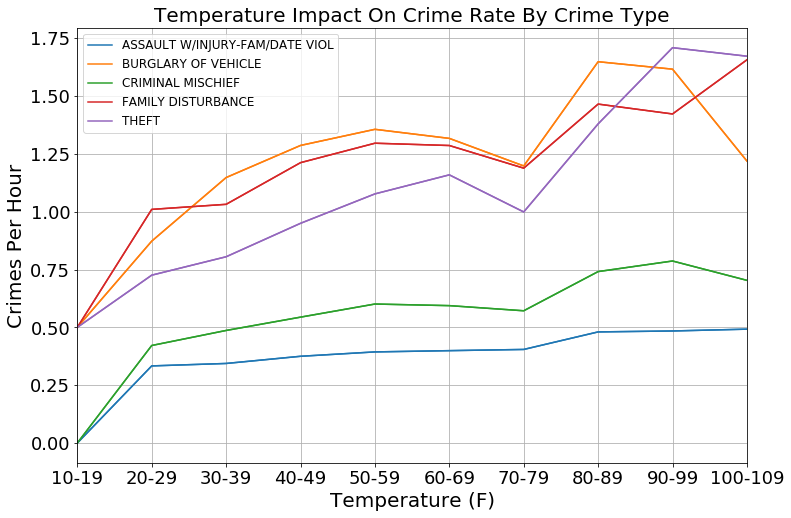

In [84]:
ax = df_pivot1.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot1.plot(figsize=(12,8), ax = ax, grid=True)
plt.title("Temperature Impact On Crime Rate By Crime Type", fontsize=20)
plt.legend(legend1, fontsize=12)
plt.xlabel("Temperature (F)", fontsize=20)
plt.ylabel("Crimes Per Hour", fontsize=20)
plt.tick_params(labelsize=18)

#### Crime Type vs. Moon Phase

In [39]:
df_2 = df_result[["Moon Phase", "Crime Type", "Date"]]
df_2

,Moon Phase,Crime Type,Date
0,0.50,ASSAULT W/INJURY-FAM/DATE VIOL,1514786400
1,0.50,DWI,1514786400
2,0.50,THEFT OF SERVICE,1514786400
3,0.50,DOC DISCHARGE GUN - PUB PLACE,1514786400
4,0.50,VIOL OF EMERG PROTECTIVE ORDER,1514786400
...,...,...,...
210300,0.19,DWI,1577854800
210301,0.19,DWI,1577854800
210302,0.19,CRASH/FAIL STOP AND RENDER AID,1577854800
210303,0.19,RUNAWAY CHILD,1577854800


In [40]:
# Change moon phases to categories
obj_weather = Weather()
df_2.loc[:, "Moon Phase"] = df_2.loc[:, "Moon Phase"].apply(obj_weather.get_moon_description)
df_2

,Moon Phase,Crime Type,Date
0,Full Moon,ASSAULT W/INJURY-FAM/DATE VIOL,1514786400
1,Full Moon,DWI,1514786400
2,Full Moon,THEFT OF SERVICE,1514786400
3,Full Moon,DOC DISCHARGE GUN - PUB PLACE,1514786400
4,Full Moon,VIOL OF EMERG PROTECTIVE ORDER,1514786400
...,...,...,...
210300,New Moon,DWI,1577854800
210301,New Moon,DWI,1577854800
210302,New Moon,CRASH/FAIL STOP AND RENDER AID,1577854800
210303,New Moon,RUNAWAY CHILD,1577854800


In [41]:
df_2["Moon Phase"].value_counts()

Full Moon             54120
Last Quarter Moon     53665
First Quarter Moon    51515
New Moon              51005
Name: Moon Phase, dtype: int64

In [42]:
# Filter for top 5 crime location types
df_top5_crime_types = df_2[df_2["Crime Type"].apply(lambda x: x in top5_crime_types.index)]
# df_top5_crime_loc_types

# Group by temperature bin to get hour counts
by_phase = df_top5_crime_types.groupby("Moon Phase")
hour_counts = by_phase["Date"].nunique()

# Group by moon phase and crime type to get crime counts
df_group2 = df_top5_crime_types.groupby(["Crime Type", "Moon Phase"])["Date"]
crime_counts = df_group2.count()

# Calculate crime rates as crimes / hours within each moon phase
crime_rates2 = crime_counts / hour_counts

# DF
df_crime_rates2 = crime_rates2.to_frame().reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates2

,Crime Type,Moon Phase,Crime Rate
0,ASSAULT W/INJURY-FAM/DATE VIOL,First Quarter Moon,0.420117
1,ASSAULT W/INJURY-FAM/DATE VIOL,Full Moon,0.425225
2,ASSAULT W/INJURY-FAM/DATE VIOL,Last Quarter Moon,0.410269
3,ASSAULT W/INJURY-FAM/DATE VIOL,New Moon,0.419453
4,BURGLARY OF VEHICLE,First Quarter Moon,1.436119
5,BURGLARY OF VEHICLE,Full Moon,1.307383
6,BURGLARY OF VEHICLE,Last Quarter Moon,1.354607
7,BURGLARY OF VEHICLE,New Moon,1.390831
8,CRIMINAL MISCHIEF,First Quarter Moon,0.638049
9,CRIMINAL MISCHIEF,Full Moon,0.606484


In [46]:
legend2 = df_crime_rates2["Crime Type"].drop_duplicates()
legend2

0     ASSAULT W/INJURY-FAM/DATE VIOL
4                BURGLARY OF VEHICLE
8                  CRIMINAL MISCHIEF
12                FAMILY DISTURBANCE
16                             THEFT
Name: Crime Type, dtype: object

In [47]:
df_pivot2 = pd.pivot_table(df_crime_rates2, values=["Crime Rate"], index =["Moon Phase"],
                   columns=["Crime Type"]).fillna(0)

df_pivot2

Crime Rate                      \
Crime Type         ASSAULT W/INJURY-FAM/DATE VIOL BURGLARY OF VEHICLE   
Moon Phase                                                              
First Quarter Moon                       0.420117            1.436119   
Full Moon                                0.425225            1.307383   
Last Quarter Moon                        0.410269            1.354607   
New Moon                                 0.419453            1.390831   

                                                                   
Crime Type         CRIMINAL MISCHIEF FAMILY DISTURBANCE     THEFT  
Moon Phase                                                         
First Quarter Moon          0.638049           1.291085  1.190500  
Full Moon                   0.606484           1.284666  1.172267  
Last Quarter Moon           0.630518           1.286228  1.145633  
New Moon                    0.630952           1.313576  1.169959

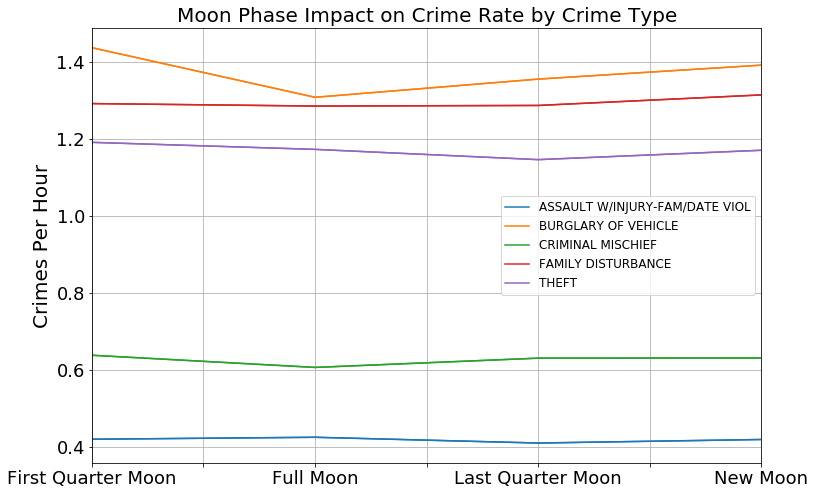

In [85]:
ax = df_pivot2.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot2.plot(figsize=(12,8), ax = ax, grid=True)
plt.title("Moon Phase Impact on Crime Rate by Crime Type", fontsize=20)
plt.legend(legend2, fontsize=12)
plt.xlabel("")
plt.ylabel("Crimes Per Hour", fontsize=20)
plt.tick_params(labelsize=18)

#### Crime Rate vs. Precipitation Intensity by Crime Location

In [67]:
df_3 = df_result[["Precipitation Intensity", "Location Type", "Date"]]
df_3

,Precipitation Intensity,Location Type,Date
0,0.0,RESIDENCE / HOME,1514786400
1,0.0,STREETS / HWY / ROAD / ALLEY,1514786400
2,0.0,STREETS / HWY / ROAD / ALLEY,1514786400
3,0.0,OTHER / UNKNOWN,1514786400
4,0.0,RESIDENCE / HOME,1514786400
...,...,...,...
210300,0.0,STREETS / HWY / ROAD / ALLEY,1577854800
210301,0.0,STREETS / HWY / ROAD / ALLEY,1577854800
210302,0.0,GAS / SERVICE STATIONS,1577854800
210303,0.0,OTHER / UNKNOWN,1577854800


In [68]:
# Top 5 Crime Types
top5_crime_locations = df_3["Location Type"].value_counts().sort_values(ascending=False).head()
top5_crime_locations

RESIDENCE / HOME                83091
STREETS / HWY / ROAD / ALLEY    39267
PARKING LOTS / GARAGE           25373
OTHER / UNKNOWN                 14041
DEPARTMENT / DISCOUNT STORE      5118
Name: Location Type, dtype: int64

In [69]:
# View precipitation intensity range
min(df_3["Precipitation Intensity"]), max(df_3["Precipitation Intensity"])

(0.0, 0.6891)

In [70]:
# Create bins
labels = ['0-.0689', '.0689-.138', '.138-.207', '.207-.276', '.276-.345', '.345-.413', '.413-.482', '.482-.551', '.551-.620', '.620-.689']
df_3["Precipitation Intensity"] = pd.cut(df_3["Precipitation Intensity"], 10, labels=labels)
df_3["Precipitation Intensity"].drop_duplicates()

/Users/carlosalzate/.local/share/virtualenvs/labs-1epcz9A2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0            0-.0689
23467      .207-.276
23475      .345-.413
23477      .413-.482
23478     .0689-.138
34105      .276-.345
42752      .138-.207
101505     .620-.689
190660     .551-.620
190670     .482-.551
Name: Precipitation Intensity, dtype: category
Categories (10, object): [0-.0689 < .0689-.138 < .138-.207 < .207-.276 ... .413-.482 < .482-.551 < .551-.620 < .620-.689]

In [71]:
# Filter for top 5 location types
df_top5_location_types = df_3[df_3["Location Type"].apply(lambda x: x in top5_crime_locations.index)]
# df_top5_location_types

# Group by precipitation intensity to get hour counts
by_precip = df_top5_location_types.groupby("Precipitation Intensity")
hour_counts = by_precip["Date"].nunique()

# Group by precipitation intensity and crime type to get crime counts
df_group3 = df_top5_location_types.groupby(["Location Type", "Precipitation Intensity"])["Date"]
crime_counts = df_group3.count()

# Calculate crime rates as crimes / hours within each precip. intensity bin
crime_rates3 = crime_counts / hour_counts

# DF
df_crime_rates3 = crime_rates3.to_frame().reset_index().rename(columns={"Date": "Crime Rate"})
df_crime_rates3

,Location Type,Precipitation Intensity,Crime Rate
0,DEPARTMENT / DISCOUNT STORE,0-.0689,0.295148
1,DEPARTMENT / DISCOUNT STORE,.0689-.138,0.321429
2,DEPARTMENT / DISCOUNT STORE,.138-.207,0.222222
3,DEPARTMENT / DISCOUNT STORE,.207-.276,0.250000
4,DEPARTMENT / DISCOUNT STORE,.276-.345,0.250000
5,DEPARTMENT / DISCOUNT STORE,.551-.620,1.000000
6,OTHER / UNKNOWN,0-.0689,0.809807
7,OTHER / UNKNOWN,.0689-.138,0.714286
8,OTHER / UNKNOWN,.138-.207,0.555556
9,OTHER / UNKNOWN,.207-.276,1.000000


In [72]:
legend3 = df_crime_rates3["Location Type"].drop_duplicates()
legend3

0      DEPARTMENT / DISCOUNT STORE
6                  OTHER / UNKNOWN
12           PARKING LOTS / GARAGE
20                RESIDENCE / HOME
30    STREETS / HWY / ROAD / ALLEY
Name: Location Type, dtype: object

In [74]:
df_pivot3 = pd.pivot_table(df_crime_rates3, values=["Crime Rate"], index =["Precipitation Intensity"],
                   columns=["Location Type"]).fillna(0)

df_pivot3

Crime Rate                  \
Location Type           DEPARTMENT / DISCOUNT STORE OTHER / UNKNOWN   
Precipitation Intensity                                               
0-.0689                                    0.295148        0.809807   
.0689-.138                                 0.321429        0.714286   
.138-.207                                  0.222222        0.555556   
.207-.276                                  0.250000        1.000000   
.276-.345                                  0.250000        1.500000   
.345-.413                                  0.000000        0.000000   
.413-.482                                  0.000000        0.000000   
.482-.551                                  0.000000        2.000000   
.551-.620                                  1.000000        0.000000   
.620-.689                                  0.000000        0.000000   

                                                                \
Location Type           PARKING LOTS / GARAGE RESIDENCE / HOME   
Precipitation Intensity                                          
0-.0689                              1.463482         4.790609   
.0689-.138                           1.321429         5.357143   
.138-.207                            1.222222         3.888889   
.207-.276                            0.750000         4.250000   
.276-.345                            2.250000         5.500000   
.345-.413                            0.000000         1.000000   
.413-.482                            0.500000         4.000000   
.482-.551                            2.000000         3.000000   
.551-.620                            0.000000         4.000000   
.620-.689                            1.000000         3.000000   

                                                      
Location Type           STREETS / HWY / ROAD / ALLEY  
Precipitation Intensity                               
0-.0689                                     2.266582  
.0689-.138                                  1.214286  
.138-.207                                   2.000000  
.207-.276                                   1.000000  
.276-.345                                   0.500000  
.345-.413                                   0.500000  
.413-.482                                   1.500000  
.482-.551                                   1.000000  
.551-.620                                   4.000000  
.620-.689                                   2.000000

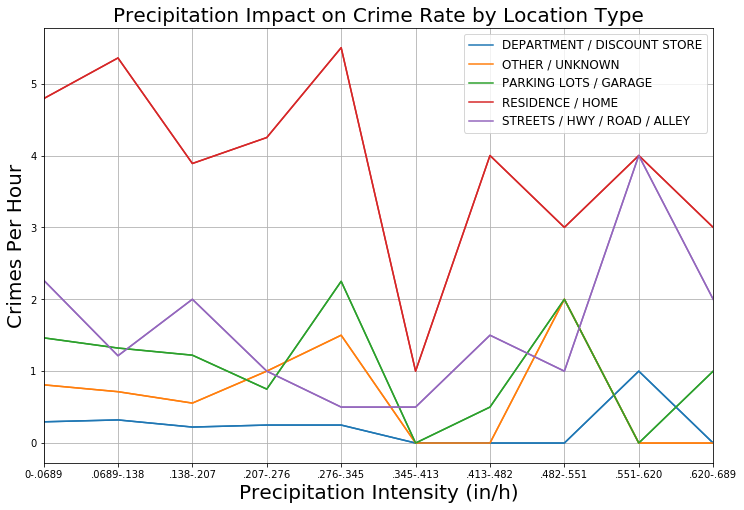

In [86]:
ax = df_pivot3.plot(figsize=(12,10), legend=False)
ax.set_prop_cycle(None)

df_pivot3.plot(figsize=(12,8), ax = ax, grid=True)
plt.title("Precipitation Impact on Crime Rate by Location Type", fontsize=20)
plt.legend(legend3, fontsize=12)
plt.xlabel("Precipitation Intensity (in/h)", fontsize=20)
plt.ylabel("Crimes Per Hour", fontsize=20)
plt.tick_params(labelsize=10)

## Written Analysis and Conclusions

Refer to ReadMe for analysis.